In [1]:
import pandas as pd

train_data = pd.read_csv("train.csv")
df = pd.read_csv("train.csv")
df.rename(columns={'y':'target'},inplace=True)
df
train_data

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,1,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no
1,2,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no
2,3,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no
3,4,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no
4,5,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3995,54,entrepreneur,married,unknown,no,1956,no,no,cellular,nov,221,5,-1,0,unknown,no
3995,3996,37,blue-collar,divorced,secondary,no,0,yes,no,cellular,apr,146,4,-1,0,unknown,yes
3996,3997,34,management,married,secondary,no,-294,yes,no,unknown,may,532,2,-1,0,unknown,no
3997,3998,43,technician,married,secondary,no,275,no,no,cellular,aug,69,6,-1,0,unknown,no


In [2]:
test_data = pd.read_csv("test.csv")
test_data

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,4000,44,services,married,secondary,no,27,no,no,cellular,may,485,1,-1,0,unknown,no
1,4001,53,admin.,divorced,secondary,no,26,yes,no,cellular,may,56,1,359,1,failure,no
2,4002,36,technician,married,secondary,no,191,no,no,cellular,aug,69,1,-1,0,unknown,no
3,4003,58,technician,divorced,secondary,no,-123,no,no,cellular,aug,131,2,-1,0,unknown,no
4,4004,26,student,single,secondary,no,-147,no,no,unknown,jun,95,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,4517,33,services,married,secondary,no,-333,yes,no,cellular,jul,329,5,-1,0,unknown,no
518,4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,may,153,1,-1,0,unknown,no
519,4519,57,technician,married,secondary,no,295,no,no,cellular,aug,151,11,-1,0,unknown,no
520,4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,feb,129,4,211,3,other,no


In [3]:
train_data.dtypes

id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
def dataset_info(df):
    # Check if the input is a pandas DataFrame
    if isinstance(df, pd.DataFrame):
        # Count the total number of missing values in the DataFrame
        is_na = df.isna().sum().sum()
        # Print information about the DataFrame
        print("Datatype shape =", df.shape)
        print("Any null values =", is_na, "\n")
        
        # Get column names, data types, and unique values for each column
        col = df.columns
        datatype = df.dtypes
        uniq = df.nunique()
        
        # Print column-wise information
        print("\033[1m", "S.NO ", " Column", "  Datatype", "  Unique Data", "\n")
        for i in range(len(df.columns)):
            print("%d %10s %10s %10s" % (i + 1, col[i], datatype[i], uniq[i]))

In [5]:
dataset_info(df)

Datatype shape = (3999, 17)
Any null values = 0 

 S.NO   Column   Datatype   Unique Data 

1         id      int64       3999
2        age      int64         66
3        job     object         12
4    marital     object          3
5  education     object          4
6    default     object          2
7    balance      int64       2178
8    housing     object          2
9       loan     object          2
10    contact     object          3
11      month     object         12
12   duration      int64        838
13   campaign      int64         31
14      pdays      int64        278
15   previous      int64         22
16   poutcome     object          4
17     target     object          2


/var/folders/m6/fz_qjnl51s70hy69d_st2z240000gn/T/ipykernel_6407/3010842282.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("%d %10s %10s %10s" % (i + 1, col[i], datatype[i], uniq[i]))


In [6]:
# Identify and categorize columns with categorical data
catagorical_data = [j for j in df.columns if df[j].dtype == "O"]
print("Keys with categorical dataset are:", "\033[1m", catagorical_data)

# Identify and categorize columns with numerical data
num = [k for k in df.columns if df[k].dtype != "O"]
print("\033[0m", "Keys with numerical dataset are:", "\033[1m", num)

Keys with categorical dataset are:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'target']
 Keys with numerical dataset are:  ['id', 'age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [7]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

# Mapping 'no' to 0 and 'yes' to 1 in the 'target' column
df['target'] = df['target'].map({'no': 0, 'yes': 1})

# Separating features (X) and target variable (y)
x = df.drop(['target'], axis=1)
y = df['target']

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

X_train_original = X_train
X_test_original = X_test

# Printing the shapes of the training and testing sets
print("Elements in X_train:", X_train.shape)
print("Elements in X_test:", X_test.shape)
print("Elements in Y_train:", Y_train.shape)
print("Elements in Y_test:", Y_test.shape)

Elements in X_train: (3199, 16)
Elements in X_test: (800, 16)
Elements in Y_train: (3199,)
Elements in Y_test: (800,)


In [8]:
X_train

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
1144,1145,48,management,married,tertiary,no,998,yes,no,cellular,jan,121,3,-1,0,unknown
452,453,27,technician,married,secondary,no,1577,yes,yes,unknown,may,266,2,-1,0,unknown
3048,3049,35,services,single,secondary,no,414,yes,no,cellular,apr,11,5,319,2,other
1039,1040,42,management,single,secondary,no,9720,no,no,cellular,aug,81,2,-1,0,unknown
3138,3139,36,management,married,tertiary,no,23,no,no,cellular,aug,133,11,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,2154,43,blue-collar,married,primary,no,255,yes,no,cellular,jul,180,1,-1,0,unknown
2864,2865,55,blue-collar,married,primary,no,1649,yes,no,cellular,may,52,3,-1,0,unknown
20,21,38,management,divorced,unknown,no,0,yes,no,cellular,nov,96,2,-1,0,unknown
1539,1540,34,blue-collar,married,secondary,no,322,yes,no,cellular,apr,10,3,-1,0,unknown


In [9]:
import category_encoders as ce

# Specify categorical columns for encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Initialize OrdinalEncoder
encoder = ce.OrdinalEncoder(cols=categorical_columns)

# Fit and transform the training set
X_train = encoder.fit_transform(X_train)

# Transform the test set using the encoder fitted on the training set
X_test = encoder.fit_transform(X_test)

# Display the column names in the encoded training set
X_train.keys
X_test.head()

/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.9/site-packages/category_encoders/utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.9/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.9/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.9/site-packages/category_encoders/util

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
2471,2472,22,1,1,1,1,2488,1,1,1,1,449,2,38,10,1
3322,3323,30,2,1,1,1,178,2,1,2,2,747,5,-1,0,2
1546,1547,53,2,2,1,1,0,1,1,3,3,36,4,-1,0,2
2496,2497,46,3,1,2,1,593,2,1,1,4,190,3,-1,0,2
3319,3320,41,1,2,1,1,1309,1,1,2,5,28,4,-1,0,2


# Random Forest Algorithm

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate RandomForestClassifier
RF = RandomForestClassifier()

# Fit the model on the training set
RF.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = RF.predict(X_test)

# Calculate accuracy score
Accuracy = accuracy_score(Y_test, Y_pred)

# Calculate confusion matrix
conf = confusion_matrix(Y_test, Y_pred)

# Generate classification report
report = classification_report(Y_test, Y_pred)

# Print the results
print(f"Accuracy score of Random Forest Algorithm is {Accuracy * 100:.2f}%")
print(f"Confusion Matrix:\n{conf}\n")
print(f"Classification Report:\n{report}")

Accuracy score of Random Forest Algorithm is 87.38%
Confusion Matrix:
[[673  20]
 [ 81  26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       693
           1       0.57      0.24      0.34       107

    accuracy                           0.87       800
   macro avg       0.73      0.61      0.64       800
weighted avg       0.85      0.87      0.85       800



remove less contributing attribute

In [11]:
f_score=pd.Series(RF.feature_importances_,index=X_train.columns).sort_values(ascending=True)
f_score

default      0.004551
loan         0.008936
housing      0.018124
contact      0.021955
marital      0.025786
education    0.028104
previous     0.028331
campaign     0.036103
job          0.048444
pdays        0.048879
poutcome     0.065098
month        0.075597
balance      0.101746
id           0.104104
age          0.104508
duration     0.279735
dtype: float64

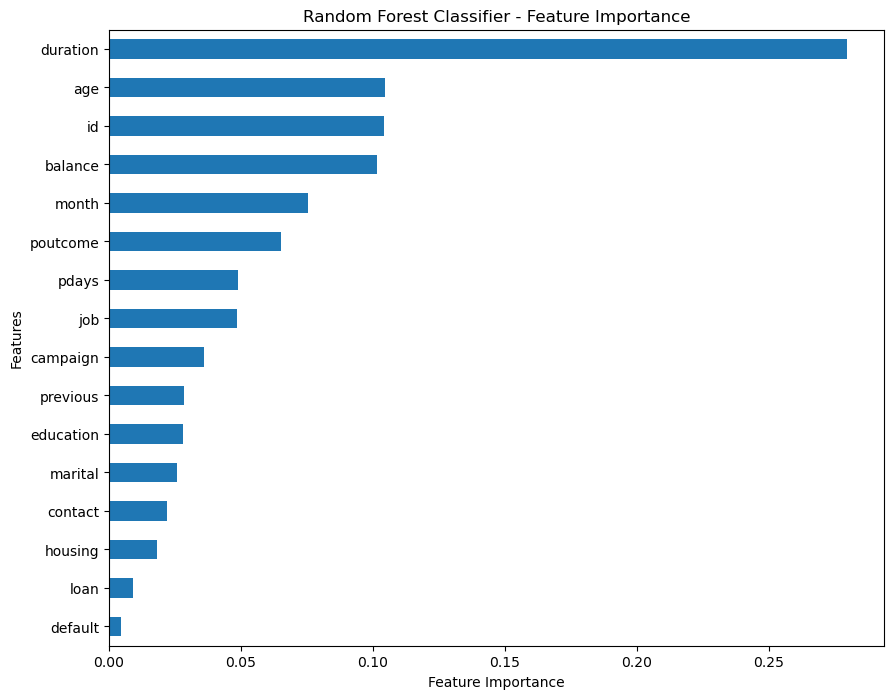

In [12]:
import matplotlib.pyplot as plt

# Plotting feature importances
f_score.plot(kind='barh', figsize=(10, 8))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()


remove outlier for scaling

In [13]:
from sklearn.preprocessing import StandardScaler

# Remove 'default' and 'loan' columns from training and testing sets
X_train = X_train.drop(columns=['default', 'loan'])
X_test = X_test.drop(columns=['default', 'loan'])

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate RandomForestClassifier with 1000 estimators
RF = RandomForestClassifier(n_estimators=1000)

# Fit the model on the modified and scaled training set
RF.fit(X_train_scaled, Y_train)

# Make predictions on the modified and scaled test set
Y_pred = RF.predict(X_test_scaled)

# Calculate accuracy score, confusion matrix, and classification report
Accuracy = accuracy_score(Y_test, Y_pred)
conf = confusion_matrix(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

# Print the results
print(f"Accuracy score of Random Forest Algorithm is {Accuracy * 100:.2f}%")
print(f"Confusion Matrix:\n{conf}\n")
print(f"Classification Report:\n{report}")

Accuracy score of Random Forest Algorithm is 88.12%
Confusion Matrix:
[[678  15]
 [ 80  27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       693
           1       0.64      0.25      0.36       107

    accuracy                           0.88       800
   macro avg       0.77      0.62      0.65       800
weighted avg       0.86      0.88      0.86       800



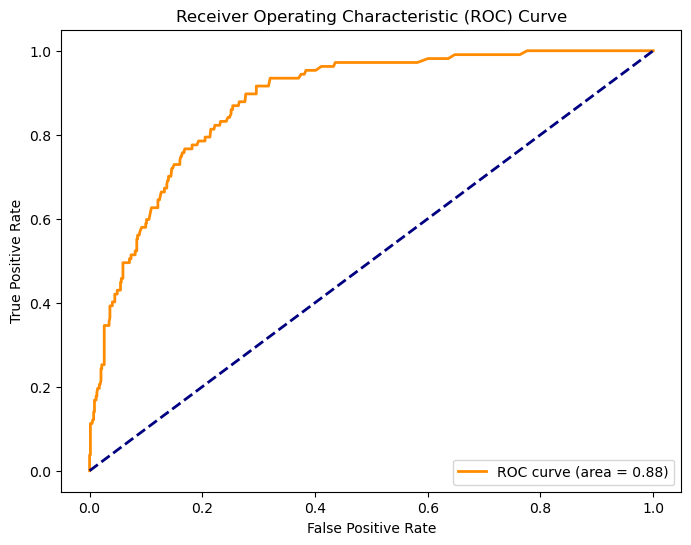

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_proba = RF.predict_proba(X_test_scaled)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=y_pred_proba)

# Calculate ROC-AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,Y_train)

Y_predicted=KNN.predict(X_test)

print(f"accuracy of the model is {accuracy_score(Y_test,Y_predicted)*100} ")

accuracy of the model is 86.625 


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train,Y_train)

Y_predicted=log.predict(X_test)

print(f"accuracy of the model is {accuracy_score(Y_test,Y_predicted)*100} ")

accuracy of the model is 88.125 


# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Instantiate SVM classifier
svm_model = SVC()

# Fit the model on the training set
svm_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_predicted_svm = svm_model.predict(X_test)

# Calculate accuracy score
accuracy_svm = accuracy_score(Y_test, Y_predicted_svm)

# Print the accuracy
print(f"Accuracy of the SVM model is {accuracy_svm * 100:.2f}%")


Accuracy of the SVM model is 88.25%


# XGBoots

In [ ]:
import xgboost as xgb

# Instantiate XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Fit the model on the training set
xgb_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_predicted_xgb = xgb_model.predict(X_test)

# Calculate accuracy score
accuracy_xgb = accuracy_score(Y_test, Y_predicted_xgb)

# Print the accuracy
print(f"Accuracy of the XGBoost model is {accuracy_xgb * 100:.2f}%")


Accuracy of the XGBoost model is 88.00%


/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Fit the model on the training set
dt_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_predicted_dt = dt_model.predict(X_test)

# Calculate accuracy score
accuracy_dt = accuracy_score(Y_test, Y_predicted_dt)

# Print the accuracy
print(f"Accuracy of the Decision Tree model is {accuracy_dt * 100:.2f}%")

# Optionally, you can print other evaluation metrics like confusion matrix and classification report
conf_dt = confusion_matrix(Y_test, Y_predicted_dt)
report_dt = classification_report(Y_test, Y_predicted_dt)

print(f"Confusion Matrix:\n{conf_dt}\n")
print(f"Classification Report:\n{report_dt}")


Accuracy of the Decision Tree model is 82.88%
Confusion Matrix:
[[634  71]
 [ 66  29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       705
           1       0.29      0.31      0.30        95

    accuracy                           0.83       800
   macro avg       0.60      0.60      0.60       800
weighted avg       0.83      0.83      0.83       800

